In [1]:
#!nvidia-smi

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading Libraries

In [1]:
#data management tools
import pandas as pd
import numpy as np

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

import seaborn as sb
import datetime

# #Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn import utils

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

# #DNN Modules
# import torch
# import tensorflow as tf
# from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import losses
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import TextVectorization

# #Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC  

# #Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

import multiprocessing
cores = multiprocessing.cpu_count()

2023-04-11 18:59:26.464889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dataloading and Preprocessing

In [2]:
#My Lenovo
#df1 = pd.read_csv('/Data/CERT/r4.2/logon.csv')
#df2 = pd.read_csv('/Data/CERT/r4.2/device.csv')
#df3 = pd.read_csv('/Data/CERT/r4.2/email.csv')
#df4 = pd.read_csv('/Data/CERT/r4.2/file.csv')
#df5 = pd.read_csv('/Data/CERT/r4.2/http.csv')
#df6 = pd.read_csv('/Data/CERT/r4.2/psychometric.csv')

#My MacBook
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
ldap = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/ldap/2009-12.csv')
#df6 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')

#Google Drive - Colab
# df1 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/logon.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/device.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/http.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/email.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/file.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/psychometric.csv')

In [3]:
START = datetime.date(2010,11,1)
END = datetime.date(2010,11, 30)

In [4]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

df1['day_date'] = pd.to_datetime(df1['date']).dt.date
df2['day_date'] = pd.to_datetime(df2['date']).dt.date
df3['day_date'] = pd.to_datetime(df3['date']).dt.date
df4['day_date'] = pd.to_datetime(df4['date']).dt.date
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

In [5]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

In [6]:
df1_bs = df1[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2_bs = df2[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3_bs = df3[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4_bs = df4[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5_bs = df5[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

# Stemming Lemmatizing Stopwords Lowercase and Tokenized

In [9]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    #token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    #include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    #filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    #stem words.
    #stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    #lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    #lower_words = [str.lower(tok) for tok in lemmed_words]
    #lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    #joined = ", ".join(lower_words)

    return(tokens)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_2528/614576161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_2528/614576161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_2528/614576161.py:3: SettingWithCopyWarning: 
A value is trying to be set o

# TFIDF

In [11]:
# nltk.download('stopwords')
# stops = set(stopwords.words('english'))
# tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

In [12]:
# tfidf_df3 = tfidfvectorizer.fit_transform(df3_bs['df3tokenized'])
# df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()
# df3_bs['df3tfidf_max'] = tfidf_df3.max()

In [13]:
# tfidf_df4 = tfidfvectorizer.fit_transform(df4_bs['df4tokenized'])
# df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()
# df4_bs['df4tfidf_max'] = tfidf_df4.max()

In [14]:
# tfidf_df5 = tfidfvectorizer.fit_transform(df5_bs['df5tokenized'])
# df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
# #df5_bs['df5tfidf_max'] = tfidf_df5.max()

# Aggregate all data

In [15]:
df_merged = pd.concat([df1_bs, df2_bs, df3_bs, df4_bs, df5_bs])

In [16]:
df_merged['label'] = 'normal'

In [17]:
df_merged.loc[df_merged['id'].isin(ans['id']),['label']] = 'bad'

In [18]:
dates = df_merged['day_date']
dates = dates.unique()

In [19]:
df_merged['df3tokenized'].fillna('', inplace=True)
df_merged['df4tokenized'].fillna('', inplace=True)
df_merged['df5tokenized'].fillna('', inplace=True)

In [20]:
dfwow = []
for d in dates:
    dayevents = df_merged.loc[(df_merged['day_date'] == d)]
    users = dayevents['user']
    users = users.unique()
    email_text = " "
    file_text = " "
    http_text = " "
    for u in users:
        userd = dayevents[(dayevents['user'] == u)]
        date = d
        username = u
        login_count = userd[userd['activity'] == 'Logon'].shape[0]
        logout_count = userd[userd['activity'] == 'Logoff'].shape[0]
        email_count = userd[userd['activity'] == 'email'].shape[0]
        file_count = userd[userd['activity'] == 'file'].shape[0]
        http_count = userd[userd['activity'] == 'http'].shape[0]
        start_time = userd['date'].iloc[0]
        end_time = userd['date'].iloc[-1]
        # tfidf3_mean = userd['df3tfidf_mean'].mean()
        # tfidf4_mean = userd['df4tfidf_mean'].mean()
        # tfidf5_mean = userd['df5tfidf_mean'].mean()
        email_text_temp = userd['df3tokenized'].to_list()
        email_text = [i for s in email_text_temp for i in s]
        file_text_temp = userd['df4tokenized'].to_list()
        file_text = [i for s in file_text_temp for i in s]
        http_text_temp = userd['df5tokenized'].to_list()
        http_text = [i for s in http_text_temp for i in s]
        text = email_text + file_text + http_text 
        if (userd[(userd['label'] == 'bad')].shape[0] > 0): label = 'bad'
        else: label = 'normal'
        dfwow.append([date, username, login_count, logout_count, email_count, file_count, http_count, start_time, end_time, email_text, file_text, http_text, text, label])

In [21]:
final = pd.DataFrame(dfwow, columns=['date', 'username', 'login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_time', 'end_time', 'email_text','file_text', 'http_text', 'text', 'label'])

In [22]:
final['start_secs'] = final['start_time'].apply(lambda s: (s - s.replace(hour=0, minute=0, second=0, microsecond=0)).seconds)
final['end_secs'] = final['end_time'].apply(lambda s: (s - s.replace(hour=0, minute=0, second=0, microsecond=0)).seconds)

In [23]:
tagged = final.apply(lambda r: TaggedDocument(words=r['text'], tags=r['username']), axis=1)
# tagged3 = final.apply(lambda r: TaggedDocument(words=r['email_text'], tags=r['username']), axis=1)
# tagged4 = final.apply(lambda r: TaggedDocument(words=r['file_text'], tags=r['username']), axis=1)
# tagged5 = final.apply(lambda r: TaggedDocument(words=r['http_text'], tags=r['username']), axis=1)

In [24]:
model_dbow = Doc2Vec(dm=0, vector_size=20, negative=10, hs=0, min_count=0, sample = 0, workers=cores)

In [25]:
model_dbow.build_vocab([x for x in tqdm(tagged.values)])

100%|██████████| 18772/18772 [00:00<00:00, 3747702.16it/s]


In [26]:
for epoch in range(2):
    model_dbow.train(utils.shuffle([x for x in tqdm(tagged.values)]), total_examples=len(tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 18772/18772 [00:00<00:00, 4460175.31it/s]


In [27]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags, model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [28]:
y, X = vec_for_learning(model_dbow, tagged)

In [29]:
d2v_df = pd.DataFrame(X, columns=['dim1','dim2','dim3','dim4','dim5', 'dim6','dim7','dim8','dim9','dim10', 'dim11','dim12','dim13','dim14','dim15', 'dim16','dim17','dim18','dim19','dim20'])

In [30]:
joined1_df = final.join(d2v_df)

In [31]:
users = joined1_df['username']
users = users.unique()

In [32]:
individual_deltas = []
for u in users:
    lastlogincount=0
    lastlogoutcount=0
    lastemailcount=0
    lastfilecount=0
    lasthttpcount=0
    laststartsecs=0
    lastendsecs=0
    lastdim1=0
    lastdim2=0
    lastdim3=0
    lastdim4=0
    lastdim5=0
    lastdim6=0
    lastdim7=0
    lastdim8=0
    lastdim9=0
    lastdim10=0
    lastdim11=0
    lastdim12=0
    lastdim13=0
    lastdim14=0
    lastdim15=0
    lastdim16=0
    lastdim17=0
    lastdim18=0
    lastdim19=0
    lastdim20=0
    userevents = joined1_df.loc[(joined1_df['username'] == u)]
    for index, row in userevents.iterrows():
        username = u
        date = row['date']
        individual_deltas.append([username, date, lastlogincount, lastlogoutcount, lastemailcount, lastfilecount, lasthttpcount, laststartsecs, lastendsecs, lastdim1, lastdim2, lastdim3, lastdim4, lastdim5, lastdim6, lastdim7, lastdim8, lastdim9, lastdim10, lastdim11, lastdim12, lastdim13, lastdim14, lastdim15, lastdim16, lastdim17, lastdim18, lastdim19, lastdim20])
        lastlogincount = row['login_count']
        lastlogoutcount = row['logout_count']
        lastemailcount = row['email_count']
        lastfilecount = row['file_count']
        lasthttpcount = row['http_count']
        laststartsecs = row['start_secs']
        lastendsecs = row['end_secs']
        lastdim1=row['dim1']
        lastdim2=row['dim2']
        lastdim3=row['dim3']
        lastdim4=row['dim4']
        lastdim5=row['dim5']
        lastdim6=row['dim6']
        lastdim7=row['dim7']
        lastdim8=row['dim8']
        lastdim9=row['dim9']
        lastdim10=row['dim10']
        lastdim11=row['dim11']
        lastdim12=row['dim12']
        lastdim13=row['dim13']
        lastdim14=row['dim14']
        lastdim15=row['dim15']
        lastdim16=row['dim16']
        lastdim17=row['dim17']
        lastdim18=row['dim18']
        lastdim19=row['dim19']
        lastdim20=row['dim20']
        

In [33]:
individual_deltas_df = pd.DataFrame(individual_deltas, columns=['username', 'date', 'lastlogincount', 'lastlogoutcount', 'lastemailcount', 'lastfilecount', 'lasthttpcount', 'laststartsecs', 'lastendsecs', 'lastdim1', 'lastdim2', 'lastdim3', 'lastdim4', 'lastdim5', 'lastdim6', 'lastdim7', 'lastdim8', 'lastdim9', 'lastdim10', 'lastdim11', 'lastdim12', 'lastdim13', 'lastdim14', 'lastdim15', 'lastdim16', 'lastdim17', 'lastdim18', 'lastdim19', 'lastdim20'])

In [34]:
final_individual_deltas_join_df = pd.merge(joined1_df, individual_deltas_df, on=['username', 'date'], how='left')

In [35]:
ldap = ldap.rename(columns={'user_id': 'username'})

In [36]:
joined_df = pd.merge(final_individual_deltas_join_df, ldap, on='username', how='left')

In [37]:
label_encoder = LabelEncoder()

In [38]:
joined_df['username'] = label_encoder.fit_transform(joined_df['username'])
joined_df['department'] = label_encoder.fit_transform(joined_df['department'])

In [39]:
depts = joined_df['department']
depts = depts.unique()

In [40]:
dept_means = []
for d in depts:
    dept_events = joined_df.loc[(joined_df['department'] == d)]
    department = d
    login_mean = dept_events['login_count'].mean()
    logout_mean = dept_events['logout_count'].mean()
    http_mean = dept_events['http_count'].mean()
    file_mean = dept_events['file_count'].mean()
    email_mean = dept_events['logout_count'].mean()
    start_mean = dept_events['start_secs'].mean()
    end_mean = dept_events['end_secs'].mean()
    dept_means.append([department, login_mean, logout_mean, email_mean, file_mean, http_mean, start_mean, end_mean])

In [41]:
dept_events_df = pd.DataFrame(dept_means, columns=['department', 'login_mean', 'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean', 'end_mean'])

In [42]:
last_joined_df = pd.merge(joined_df, dept_events_df, on='department', how='left')

In [43]:
matrix_delta = last_joined_df.loc[:, ['lastdim1','lastdim2','lastdim3','lastdim4','lastdim5','lastdim6','lastdim7','lastdim8','lastdim9','lastdim10','lastdim11','lastdim12','lastdim13','lastdim14', 'lastdim15', 'lastdim16','lastdim17','lastdim18','lastdim19','lastdim20']]
matrix_delta.rename(columns = {'lastdim1':'dim1','lastdim2':'dim2','lastdim3':'dim3','lastdim4':'dim4','lastdim5':'dim5','lastdim6':'dim6','lastdim7':'dim7','lastdim8':'dim8','lastdim9':'dim9','lastdim10':'dim10','lastdim11':'dim11','lastdim12':'dim12','lastdim13':'dim13','lastdim14':'dim14', 'lastdim15':'dim15', 'lastdim16':'dim16','lastdim17':'dim17','lastdim18':'dim18','lastdim19':'dim19','lastdim20':'dim20'}, inplace = True)

In [44]:
matrix_original = last_joined_df.loc[:, ['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10','dim11','dim12','dim13','dim14', 'dim15', 'dim16','dim17','dim18','dim19','dim20']]

In [45]:
def Euclidean_Dist(df1, df2, cols=['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10','dim11','dim12','dim13','dim14','dim15','dim16','dim17','dim18','dim19','dim20']):
    return np.linalg.norm(df1[cols].values - df2[cols].values, axis=1)

In [46]:
text_dist = Euclidean_Dist(matrix_original, matrix_delta)

In [47]:
last_joined_df['text_distance'] = text_dist.tolist()

In [48]:
last_joined_df['login_delta'] = (last_joined_df['login_count'] - last_joined_df['login_mean'])
last_joined_df['logout_delta'] = (last_joined_df['logout_count'] - last_joined_df['logout_mean'])
last_joined_df['email_delta'] = (last_joined_df['email_count'] - last_joined_df['email_mean'])
last_joined_df['file_delta'] = (last_joined_df['file_count'] - last_joined_df['file_mean'])
last_joined_df['http_delta'] = (last_joined_df['http_count'] - last_joined_df['http_mean'])
last_joined_df['start_delta'] = (last_joined_df['start_secs'] - last_joined_df['start_mean'])
last_joined_df['end_delta'] = (last_joined_df['end_secs'] - last_joined_df['end_mean'])

In [49]:
last_joined_df['ind_login_delta'] = (last_joined_df['login_count'] - last_joined_df['lastlogincount'])
last_joined_df['ind_logout_delta'] = (last_joined_df['logout_count'] - last_joined_df['lastlogoutcount'])
last_joined_df['ind_email_delta'] = (last_joined_df['email_count'] - last_joined_df['lastemailcount'])
last_joined_df['ind_file_delta'] = (last_joined_df['login_count'] - last_joined_df['lastfilecount'])
last_joined_df['ind_http_delta'] = (last_joined_df['login_count'] - last_joined_df['lasthttpcount'])
last_joined_df['ind_start_secs_delta'] = (last_joined_df['start_secs'] - last_joined_df['laststartsecs'])
last_joined_df['ind_end_secs_delta'] = (last_joined_df['end_secs'] - last_joined_df['lastendsecs'])


In [50]:
users = last_joined_df['username']
users = users.unique()

In [51]:
for u in users:
    userIndex = last_joined_df[(last_joined_df['username'] == u)].first_valid_index()
    last_joined_df.drop(userIndex , inplace=True)

In [52]:
last_joined_df.loc[last_joined_df['label'] == 'normal', 'label'] = 0

In [53]:
last_joined_df.loc[last_joined_df['label'] == 'bad', 'label'] = 1

In [54]:
last_joined_df['label'] = last_joined_df['label'].astype('int64')

# Sampling Methods

<Axes: xlabel='label', ylabel='count'>

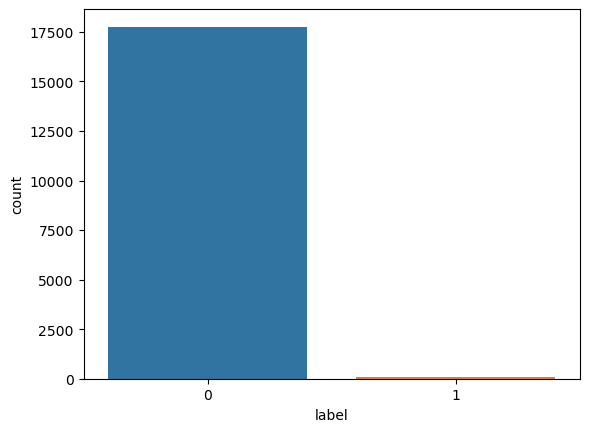

In [55]:
sb.countplot(data=last_joined_df, x='label')

In [56]:
last_joined_df.columns

Index(['date', 'username', 'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_time', 'end_time', 'email_text',
       'file_text', 'http_text', 'text', 'label', 'start_secs', 'end_secs',
       'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
       'dim18', 'dim19', 'dim20', 'lastlogincount', 'lastlogoutcount',
       'lastemailcount', 'lastfilecount', 'lasthttpcount', 'laststartsecs',
       'lastendsecs', 'lastdim1', 'lastdim2', 'lastdim3', 'lastdim4',
       'lastdim5', 'lastdim6', 'lastdim7', 'lastdim8', 'lastdim9', 'lastdim10',
       'lastdim11', 'lastdim12', 'lastdim13', 'lastdim14', 'lastdim15',
       'lastdim16', 'lastdim17', 'lastdim18', 'lastdim19', 'lastdim20',
       'employee_name', 'email', 'role', 'business_unit', 'functional_unit',
       'department', 'team', 'supervisor', 'login_mean', 'logout_mean',
       'email_mean', 'file_m

In [57]:
X = last_joined_df.loc[:, ['login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_secs', 'end_secs',
       'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
       'dim18', 'dim19', 'dim20', 'text_distance', 'login_delta', 'logout_delta', 'email_delta',
       'file_delta', 'http_delta', 'start_delta', 'end_delta',
       'ind_login_delta', 'ind_logout_delta', 'ind_email_delta',
       'ind_file_delta', 'ind_http_delta', 'ind_start_secs_delta',
       'ind_end_secs_delta']]

In [58]:
# X = last_joined_df.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count', 'start_secs', 'end_secs',
#        'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
#        'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
#        'dim18', 'dim19', 'dim20']]

In [59]:
y = last_joined_df['label']

In [60]:
sc = StandardScaler()
# sc = MaxAbsScaler()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()

In [63]:
X_train.drop(['index'], axis=1, inplace=True)
X_test.drop(['index'], axis=1, inplace=True)

y_train.drop(['index'], axis=1, inplace=True)
y_test.drop(['index'], axis=1, inplace=True)

In [64]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [65]:
# X_train = pd.DataFrame(X_train, columns=['login_delta', 'logout_delta', 'email_delta', 'file_delta',
#        'http_delta', 'start_delta', 'end_delta', 'ind_login_delta',
#        'ind_logout_delta', 'ind_email_delta', 'ind_file_delta',
#        'ind_http_delta', 'ind_start_secs_delta', 'ind_end_secs_delta'])

# X_test = pd.DataFrame(X_test, columns=['login_delta', 'logout_delta', 'email_delta', 'file_delta',
#        'http_delta', 'start_delta', 'end_delta', 'ind_login_delta',
#        'ind_logout_delta', 'ind_email_delta', 'ind_file_delta',
#        'ind_http_delta', 'ind_start_secs_delta', 'ind_end_secs_delta'])

X_train = pd.DataFrame(X_train, columns=[
       'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_secs', 'end_secs',
       'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
       'dim18', 'dim19', 'dim20', 'text_distance', 'login_delta', 'logout_delta', 'email_delta',
       'file_delta', 'http_delta', 'start_delta', 'end_delta',
       'ind_login_delta', 'ind_logout_delta', 'ind_email_delta',
       'ind_file_delta', 'ind_http_delta', 'ind_start_secs_delta',
       'ind_end_secs_delta'])

X_test = pd.DataFrame(X_test, columns=[
       'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_secs', 'end_secs',
       'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
       'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
       'dim18', 'dim19', 'dim20', 'text_distance', 'login_delta', 'logout_delta', 'email_delta',
       'file_delta', 'http_delta', 'start_delta', 'end_delta',
       'ind_login_delta', 'ind_logout_delta', 'ind_email_delta',
       'ind_file_delta', 'ind_http_delta', 'ind_start_secs_delta',
       'ind_end_secs_delta'])

# X_train = pd.DataFrame(X_train, columns=[
#        'login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count', 'start_secs', 'end_secs',
#        'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
#        'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
#        'dim18', 'dim19', 'dim20'])

# X_test = pd.DataFrame(X_test, columns=[
#        'login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count', 'start_secs', 'end_secs',
#        'dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9',
#        'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17',
#        'dim18', 'dim19', 'dim20'])


In [66]:
final_undersample = RandomUnderSampler(sampling_strategy='majority')
X_final_under, y_final_under = final_undersample.fit_resample(X_train, y_train)

In [67]:
final_oversample = RandomOverSampler(sampling_strategy='minority')
X_final_over, y_final_over = final_oversample.fit_resample(X_train, y_train)

In [68]:
final_smote = SMOTE(k_neighbors=10)
X_final_smote, y_final_smote = final_smote.fit_resample(X_train, y_train)

In [69]:
final_blsmote = BorderlineSMOTE(k_neighbors=10)
X_final_blsmote, y_final_blsmote = final_blsmote.fit_resample(X_train, y_train)

In [70]:
final_adasyn = ADASYN(n_neighbors=10)
X_final_adasyn, y_final_adasyn = final_adasyn.fit_resample(X_train, y_train)

In [71]:
final_under = X_final_under.copy()
final_over = X_final_over.copy()
final_smote = X_final_smote.copy()
final_blsmote = X_final_blsmote.copy()
final_adasyn = X_final_adasyn.copy()

In [72]:
final_under['label'] = y_final_under
final_over['label'] = y_final_over
final_smote['label'] = y_final_smote
final_blsmote['label'] = y_final_blsmote
final_adasyn['label'] = y_final_adasyn

In [73]:
# sb.displot(data=final_adasyn, x="start_delta", y='ind_start_secs_delta', hue="label", kind='kde')

In [74]:
# sb.pairplot(X)

In [76]:
#C is the most meaningful - penalty would error out
param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
grid.fit(X_train,y_train.values.ravel())
print("LR best estimater: ", grid.best_estimator_)
print("LR Best parameters:", grid.best_params_)


LR best estimater:  LogisticRegression(C=10, max_iter=1000)
LR Best parameters: {'C': 10, 'max_iter': 1000}


In [77]:

#linear failed to converge
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train,y_train.values.ravel())
print("SVM best estimater: ", grid.best_estimator_)
print("SVM Best parameters:", grid.best_params_)


SVM best estimater:  SVC(C=100, gamma=0.01)
SVM Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [78]:

param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train,y_train.values.ravel())
print("KNN best estimater: ", grid.best_estimator_)
print("KNN Best parameters:", grid.best_params_)


KNN best estimater:  KNeighborsClassifier(metric='manhattan', n_neighbors=1)
KNN Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [79]:

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train, y_train.values.ravel())
print("RF Best estimater:", grid.best_estimator_)
print("RF Best parameters:", grid.best_params_)


RF Best estimater: RandomForestClassifier(min_samples_split=10, n_estimators=10)
RF Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


In [83]:

param_grid = {
     'n_estimators': [100, 200, 300],
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train, y_train.values.ravel())
print("ADA Best estimater:", grid.best_estimator_)
print("ADA Best parameters:", grid.best_params_)

ADA Best estimater: AdaBoostClassifier(learning_rate=1, n_estimators=200)
ADA Best parameters: {'learning_rate': 1, 'n_estimators': 200}


In [84]:
lr = LogisticRegression(max_iter=1000, C=10)
svm = SVC(kernel='poly', C=100, gamma=0.01)
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan', weights='uniform')
rf = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf = 1, min_samples_split = 10, n_estimators= 10, random_state=42)
ada = AdaBoostClassifier(learning_rate = 1, n_estimators = 200)

In [85]:
results_no_sample = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train, y_train.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_no_sample.append([acc, rec])


In [86]:
X_numpy_nosample = np.expand_dims(X_train.values[:,:],axis = 2)
y_numpy_nosample = y_train.values[:]
X_numpy_nosample_test = np.expand_dims(X_test.values[:,:],axis = 2)
y_numpy_nosample_test = y_test.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(42, 1)))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=256, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_numpy_nosample, y_numpy_nosample, epochs=10, batch_size=128, validation_data=(X_numpy_nosample_test, y_numpy_nosample_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy)
predlabels = [int(p>=0.5) for p in ypred]
cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(cf_matrix)
print("LSTM Accuracy:", acc)
print("LSTM Recall:", rec)
cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(results_no_sample)

2023-04-11 23:12:23.865294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
98/98 [==============================] - 60s 583ms/step - loss: 0.0690 - auc: 0.4795 - accuracy: 0.9891 - recall: 0.0312 - val_loss: 0.0333 - val_auc: 0.5000 - val_accuracy: 0.9948 - val_recall: 0.0000e+00
Epoch 2/10
98/98 [==============================] - 21s 215ms/step - loss: 0.0326 - auc: 0.5263 - accuracy: 0.9949 - recall: 0.0000e+00 - val_loss: 0.0329 - val_auc: 0.5000 - val_accuracy: 0.9948 - val_recall: 0.0000e+00
Epoch 3/10
98/98 [==============================] - 21s 213ms/step - loss: 0.0325 - auc: 0.5288 - accuracy: 0.9949 - recall: 0.0000e+00 - val_loss: 0.0327 - val_auc: 0.6002 - val_accuracy: 0.9948 - val_recall: 0.0000e+00
Epoch 4/10
98/98 [==============================] - 21s 212ms/step - loss: 0.0326 - auc: 0.5036 - accuracy: 0.9949 - recall: 0.0000e+00 - val_loss: 0.0325 - val_auc: 0.5842 - val_accuracy: 0.9948 - val_recall: 0.0000e+00
Epoch 5/10
98/98 [==============================] - 21s 210ms/step - loss: 0.0328 - auc: 0.5626 - accuracy: 0.9947 - rec

# Underfitting

In [87]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_final_under, y_final_under, test_size=0.3)

In [88]:
#C is the most meaningful - penalty had no impact and would error out
param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
grid.fit(X_train_under,y_train_under.values.ravel())
print("LR best estimater: ", grid.best_estimator_)
print("LR Best parameters:", grid.best_params_)
under_lr_best_est = grid.best_estimator_


LR best estimater:  LogisticRegression(C=0.1, max_iter=1000)
LR Best parameters: {'C': 0.1, 'max_iter': 1000}


In [89]:

#linear failed to converge 
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_under,y_train_under.values.ravel())
print("SVM best estimater: ", grid.best_estimator_)
print("SVM Best parameters:", grid.best_params_)
under_svm_best_est = grid.best_estimator_



SVM best estimater:  SVC(C=1, gamma=0.01)
SVM Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [90]:

param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_under,y_train_under.values.ravel())
print("KNN best estimater: ", grid.best_estimator_)
print("KNN Best parameters:", grid.best_params_)
under_knn_best_est = grid.best_estimator_


KNN best estimater:  KNeighborsClassifier(metric='manhattan', n_neighbors=3)
KNN Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [91]:

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_under, y_train_under.values.ravel())
print("RF Best estimater:", grid.best_estimator_)
print("RF Best parameters:", grid.best_params_)
under_rf_best_est = grid.best_estimator_



RF Best estimater: RandomForestClassifier(min_samples_leaf=2, n_estimators=50)
RF Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [92]:

param_grid = {
     'n_estimators': [100, 200, 300],
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_under, y_train_under.values.ravel())
print("ADA Best estimater:", grid.best_estimator_)
print("ADA Best parameters:", grid.best_params_)
under_ada_best_est = grid.best_estimator_


ADA Best estimater: AdaBoostClassifier(learning_rate=1, n_estimators=100)
ADA Best parameters: {'learning_rate': 1, 'n_estimators': 100}


In [95]:
#Adapt from above
lr = under_lr_best_est
svm = under_svm_best_est
knn = under_knn_best_est
rf = under_rf_best_est
ada = under_ada_best_est


In [96]:
results_under = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_under, y_train_under.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_under.append([acc, rec])

In [97]:
X_numpy_under = np.expand_dims(X_train_under.values[:,:],axis = 2)
y_numpy_under = y_train_under.values[:]
X_numpy_under_test = np.expand_dims(X_test_under.values[:,:],axis = 2)
y_numpy_under_test = y_test_under.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(42, 1)))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=256, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_numpy_under, y_numpy_under, epochs=10, batch_size=128, validation_data=(X_numpy_under_test, y_numpy_under_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy)
predlabels = [int(p>=0.5) for p in ypred]
acc = metrics.accuracy_score(y_test, predlabels)
rec = metrics.recall_score(y_test, predlabels)
print("LSTM Accuracy:", acc)
print("LSTM Recall:", rec)
cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(cf_matrix)
results_under.append([metrics.accuracy_score(y_test, predicted), metrics.recall_score(y_test, predlabels)])
print(results_under)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6929 - auc: 0.5119 - accuracy: 0.5730 - recall: 0.3571 - val_loss: 0.6958 - val_auc: 0.4626 - val_accuracy: 0.4103 - val_recall: 0.0455
Epoch 2/10
1/1 [==============================] - 0s 236ms/step - loss: 0.6880 - auc: 0.5633 - accuracy: 0.6292 - recall: 0.2857 - val_loss: 0.6995 - val_auc: 0.5000 - val_accuracy: 0.3846 - val_recall: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 216ms/step - loss: 0.6833 - auc: 0.5512 - accuracy: 0.6180 - recall: 0.2619 - val_loss: 0.7056 - val_auc: 0.4973 - val_accuracy: 0.3846 - val_recall: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 216ms/step - loss: 0.6788 - auc: 0.5471 - accuracy: 0.5955 - recall: 0.2143 - val_loss: 0.7129 - val_auc: 0.4840 - val_accuracy: 0.4103 - val_recall: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 216ms/step - loss: 0.6748 - auc: 0.5474 - accuracy: 0.5843 - recall: 0.1905 - val_loss: 0.7137 - v

# Overfitting

In [98]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_final_over, y_final_over, test_size=0.3)


In [99]:
#C is the most meaningful - penalty had no impact and would error out
param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
grid.fit(X_train_over,y_train_over.values.ravel())
print("LR best estimater: ", grid.best_estimator_)
print("LR Best parameters:", grid.best_params_)
over_lr_best_est = grid.best_estimator_



LR best estimater:  LogisticRegression(C=0.1, max_iter=1000)
LR Best parameters: {'C': 0.1, 'max_iter': 1000}


In [100]:
#linear failed to converge 
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_over,y_train_over.values.ravel())
print("SVM best estimater: ", grid.best_estimator_)
print("SVM Best parameters:", grid.best_params_)
over_svm_best_est = grid.best_estimator_


In [ ]:

param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_over,y_train_over.values.ravel())
print("KNN best estimater: ", grid.best_estimator_)
print("KNN Best parameters:", grid.best_params_)
over_knn_best_est = grid.best_estimator_


In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_over, y_train_over.values.ravel())
print("RF Best estimater:", grid.best_estimator_)
print("RF Best parameters:", grid.best_params_)
over_rf_best_est = grid.best_estimator_


In [ ]:

param_grid = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_over, y_train_over.values.ravel())
print("ADA Best estimater:", grid.best_estimator_)
print("ADA Best parameters:", grid.best_params_)
over_ada_best_est = grid.best_estimator_


In [ ]:
#Adapt from above
lr = over_lr_best_est
svm = over_svm_best_est
knn = over_knn_best_est
rf = over_rf_best_est
ada = over_ada_best_est

In [ ]:
results_over = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_over, y_train_over.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_over.append([acc, rec])

In [ ]:
X_numpy_over = np.expand_dims(X_train_over.values[:,:],axis = 2)
y_numpy_over = y_train_over.values[:]
X_numpy_over_test = np.expand_dims(X_test_over.values[:,:],axis = 2)
y_numpy_over_test = y_test_over.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(42, 1)))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=256, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_numpy_over, y_numpy_over, epochs=10, batch_size=128, validation_data=(X_numpy_over_test, y_numpy_over_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy)
predlabels = [int(p>=0.5) for p in ypred]
acc = metrics.accuracy_score(y_test, predlabels)
rec = metrics.recall_score(y_test, predlabels)
print("LSTM Accuracy:", acc)
print("LSTM Recall:", rec)
cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(cf_matrix)
results_over.append([acc, rec])
print(results_over)

Epoch 1/10


ValueError: in user code:

    File "/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_48" is incompatible with the layer: expected shape=(None, 42, 1), found shape=(None, 27, 1)


# SMOTE

In [96]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_final_smote, y_final_smote, test_size=0.3)

In [ ]:
#C is the most meaningful - penalty had no impact and would error out
param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
grid.fit(X_train_smote,y_train_smote.values.ravel())
print("logistic regression best: ", grid.best_estimator_)
smote_lr_best_est = grid.best_estimator_



In [ ]:

#linear failed to converge
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_smote,y_train_smote.values.ravel())
print("SVM best: ", grid.best_estimator_)
smote_svm_best_est = grid.best_estimator_



In [ ]:

param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_smote,y_train_smote.values.ravel())
print("KNN best: ", grid.best_estimator_)
smote_knn_best_est = grid.best_estimator_



In [ ]:

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_smote, y_train_smote.values.ravel())
print("RF Best estimater:", grid.best_estimator_)
print("RF Best parameters:", grid.best_params_)
print("RF Best score:", grid.best_score_)
smote_rf_best_est = grid.best_estimator_



In [ ]:

param_grid = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_smote, y_train_smote.values.ravel())
print("ADA Best estimater:", grid.best_estimator_)
print("ADA Best parameters:", grid.best_params_)
print("ADA Best score:", grid.best_score_)
smote_ada_best_est = grid.best_estimator_


In [ ]:
#Adapt from above
lr = smote_lr_best_est
svm = smote_svm_best_est
knn = smote_knn_best_est
rf = smote_rf_best_est
ada = smote_ada_best_est


In [ ]:
results_smote = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_smote, y_train_smote.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_smote.append([acc, rec])
print(results_no_sample)

In [ ]:
X_numpy_smote = np.expand_dims(X_train_smote.values[:,:],axis = 2)
y_numpy_smote = y_train_smote.values[:]
X_numpy_smote_test = np.expand_dims(X_test_smote.values[:,:],axis = 2)
y_numpy_smote_test = y_test_smote.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(42, 1)))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=256, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_numpy_smote, y_numpy_smote, epochs=10, batch_size=128, validation_data=(X_numpy_smote_test, y_numpy_smote_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy)
predlabels = [int(p>=0.5) for p in ypred]
acc = metrics.accuracy_score(y_test, predlabels)
rec = metrics.recall_score(y_test, predlabels)
print("LSTM Accuracy:", acc)
print("LSTM Recall:", rec)
cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(cf_matrix)
results_under.append([metrics.accuracy_score(y_test, predicted), metrics.recall_score(y_test, predlabels)])
print(results_under)

# ADASYN

In [102]:
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_final_adasyn, y_final_adasyn, test_size=0.3)

In [ ]:
#C is the most meaningful - penalty had no impact and would error out
param_grid = {'C': [0.1,1, 10, 100]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
print("logistic regression best: ", grid.best_estimator_)
ada_lr_best_est = grid.best_estimator_



In [ ]:

#linear failed to converge
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
print("SVM best: ", grid.best_estimator_)
ada_svm_best_est = grid.best_estimator_



In [ ]:

param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
print("KNN best: ", grid.best_estimator_)
ada_knn_best_est = grid.best_estimator_



In [ ]:

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_adasyn, y_train_adasyn.values.ravel())
print("RF Best estimater:", grid.best_estimator_)
print("RF Best parameters:", grid.best_params_)
print("RF Best score:", grid.best_score_)
ada_rf_best_est = grid.best_estimator_


In [ ]:

param_grid = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_adasyn, y_train_adasyn.values.ravel())
print("ADA Best estimater:", grid.best_estimator_)
print("ADA Best parameters:", grid.best_params_)
print("ADA Best score:", grid.best_score_)
ada_ada_best_est = grid.best_estimator_



In [ ]:
#Adapt from above
lr = ada_lr_best_est
svm = ada_svm_best_est
knn = ada_knn_best_est
rf = ada_rf_best_est
ada = ada_ada_best_est


In [ ]:
results_over = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_adasyn, y_train_adasyn.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_no_sample.append([acc, rec])
print(results_no_sample)

In [ ]:
X_numpy_adasyn = np.expand_dims(X_train_adasyn.values[:,:],axis = 2)
y_numpy_adasyn = y_train_adasyn.values[:]
X_numpy_adasyn_test = np.expand_dims(X_test_adasyn.values[:,:],axis = 2)
y_numpy_adasyn_test = y_test_adasyn.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(42, 1)))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=256, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_numpy_adasyn, y_numpy_adasyn, epochs=10, batch_size=128, validation_data=(X_numpy_adasyn_test, y_numpy_adasyn_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy)
predlabels = [int(p>=0.5) for p in ypred]
acc = metrics.accuracy_score(y_test, predlabels)
rec = metrics.recall_score(y_test, predlabels)
print("LSTM Accuracy:", acc)
print("LSTM Recall:", rec)
cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(cf_matrix)
results_under.append([metrics.accuracy_score(y_test, predicted), metrics.recall_score(y_test, predlabels)])
print(results_under)

# Borderline SMOTE

In [108]:
X_train_blsmote, X_test_blsmote, y_train_blsmote, y_test_blsmote = train_test_split(X_final_blsmote, y_final_blsmote, test_size=0.3)

In [ ]:
#C is the most meaningful - penalty had no impact and would error out
param_grid = {'C': [0.1,1, 10, 100]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
print("logistic regression best: ", grid.best_estimator_)
bls_lr_best_est = grid.best_estimator_



In [ ]:

#linear failed to converge
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
print("SVM best: ", grid.best_estimator_)
bls_svm_best_est = grid.best_estimator_

In [ ]:

param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
print("KNN best: ", grid.best_estimator_)
bls_knn_best_est = grid.best_estimator_



In [ ]:

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_blsmote, y_train_blsmote.values.ravel())
print("RF Best estimater:", grid.best_estimator_)
print("RF Best parameters:", grid.best_params_)
print("RF Best score:", grid.best_score_)
bls_rf_best_est = grid.best_estimator_



In [ ]:

param_grid = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
grid.fit(X_train_blsmote, y_train_blsmote)
print("ADA Best estimater:", grid.best_estimator_)
print("ADA Best parameters:", grid.best_params_)
print("ADA Best score:", grid.best_score_)
bls_ada_best_est = grid.best_estimator_

In [ ]:
#Adapt from above
lr = bls_lr_best_est
svm = bls_svm_best_est
knn = bls_knn_best_est
rf = bls_rf_best_est
ada = bls_ada_best_est

In [ ]:
results_over = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_blsmote, y_train_blsmote.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_no_sample.append([acc, rec])
print(results_no_sample)

In [ ]:
X_numpy_blsmote = np.expand_dims(X_train_blsmote.values[:,:],axis = 2)
y_numpy_blsmote = y_train_blsmote.values[:]
X_numpy_blsmote_test = np.expand_dims(X_test_blsmote.values[:,:],axis = 2)
y_numpy_blsmote_test = y_test_blsmote.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(42, 1)))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=256, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_numpy_blsmote, y_numpy_blsmote, epochs=10, batch_size=128, validation_data=(X_numpy_blsmote_test, y_numpy_blsmote_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy)
predlabels = [int(p>=0.5) for p in ypred]
acc = metrics.accuracy_score(y_test, predlabels)
rec = metrics.recall_score(y_test, predlabels)
print("LSTM Accuracy:", acc)
print("LSTM Recall:", rec)
cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(cf_matrix)
results_under.append([metrics.accuracy_score(y_test, predicted), metrics.recall_score(y_test, predlabels)])
print(results_under)

<Axes: >

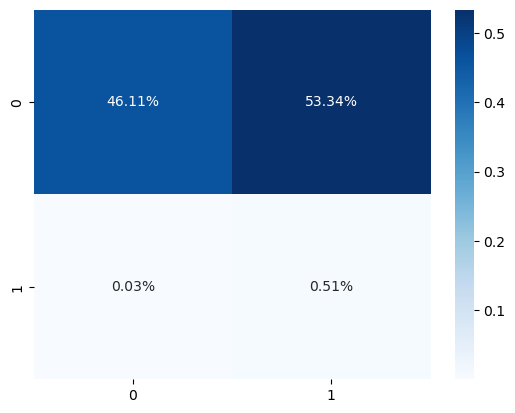

In [115]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [374]:
X_nump = np.expand_dims(X_train_blsmote.values[:,:],axis = 2)
y_nump = y_train_blsmote.values[:]
X_nump_t = np.expand_dims(X_test_blsmote.values[:,:],axis = 2)
y_nump_t = y_test_blsmote.values[:]
model = Sequential()
model.add(LSTM(64, input_shape=(27, 1), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_nump, y_nump, epochs=10, batch_size=128, validation_data=(X_nump_t, y_nump_t))
X_n = np.expand_dims(X_test.values[:],axis = 2)
y_n = y_test.values[:]
ypred = model.predict(X_n)
predlabels = [int(p>=0.5) for p in ypred]
print("LSTM Accuracy:",metrics.accuracy_score(y_test, predlabels))
print("LSTM Recall:",metrics.recall_score(y_test, predlabels))
cf_matrix = metrics.confusion_matrix(y_test,predlabels)

In [ ]:
# mean0 = final_adasyn[final_adasyn['label'] == 0].sample(30)
# mean1 = final_adasyn[final_adasyn['label'] == 1].sample(30)
# fvalue, pvalue = stats.ttest_ind(mean0['text_distance'], mean1['text_distance'])
# print(fvalue, pvalue)

In [ ]:
# pca = PCA(n_components = 5)
# X_train_blsmote = pca.fit_transform(X_train_blsmote)
# X_test_blsmote = pca.transform(X_test_blsmote)
# explained_variance = pca.explained_variance_ratio_
# explained_variance